# Ejercicio Regresión Lineal

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
altura = [162,212,220,206,152,183,167,175,156,186,183,163,163,172,194,168,
          161,164,188,187,162,192,184,206,175,154,187,212,195,205]

In [3]:
peso = [68.78,74.11,71.73,69.88,67.25,68.78,68.34,67.01,63.45,71.19,67.19,65.80,
        64.30,67.97,72.18,65.27,66.09,67.51,70.10,68.25, 67.89,68.14,69.08,
        72.80, 67.42, 68.49, 68.61, 74.03, 71.52,69.18]

In [4]:
data = pd.DataFrame(
{
    "peso":peso,
    "altura":altura
})

In [5]:
data.head()

,peso,altura
0,68.78,162
1,74.11,212
2,71.73,220
3,69.88,206
4,67.25,152


### Regresion Lineal metodo

In [6]:
lm = smf.ols(formula="altura~peso",data = data).fit()

In [7]:
lm.params

Intercept   -218.524873
peso           5.813661
dtype: float64

In [8]:
lm.pvalues

Intercept    7.469820e-04
peso         1.576033e-07
dtype: float64

In [9]:
lm.rsquared

0.6314262963192163

In [10]:
lm.rsquared_adj

0.6182629497591883

In [11]:
altura_pred = lm.predict(pd.DataFrame(data["peso"]))

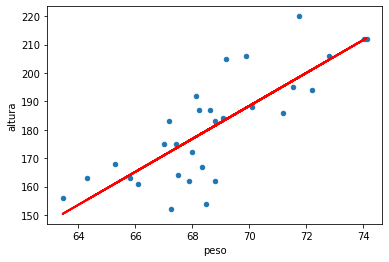

In [12]:
data.plot(kind = "scatter" ,x ="peso", y ="altura")
plt.plot(pd.DataFrame(data["peso"]),altura_pred,c="red", linewidth=2)

### Modelo predictivo 

In [13]:
data["altura_pred"] = -218.524873 + 5.813661 * data["peso"]

In [14]:
data["RSE"] = (data["altura"]-data["altura_pred"])**2

In [15]:
SSD = sum(data["RSE"])
SSD

3939.85631971621

In [16]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

11.862088950753106

In [17]:
altura_m = np.mean(data["altura"])
altura_m

181.13333333333333

### Error estandar residual 

In [18]:
(RSE / altura_m)

0.06548816130338483

(array([1., 2., 2., 3., 3., 8., 4., 3., 1., 3.]),
 array([-25.65276889, -20.93639505, -16.22002122, -11.50364738,
         -6.78727355,  -2.07089971,   2.64547413,   7.36184796,
         12.0782218 ,  16.79459563,  21.51096947]),
 <a list of 10 Patch objects>)

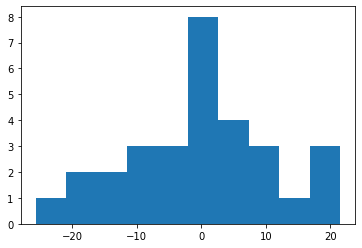

In [19]:
plt.hist((data["altura"]-data["altura_pred"]))#SSD